<a href="https://colab.research.google.com/github/RahulYaramaneni7/CODESOFT/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to the Project.**
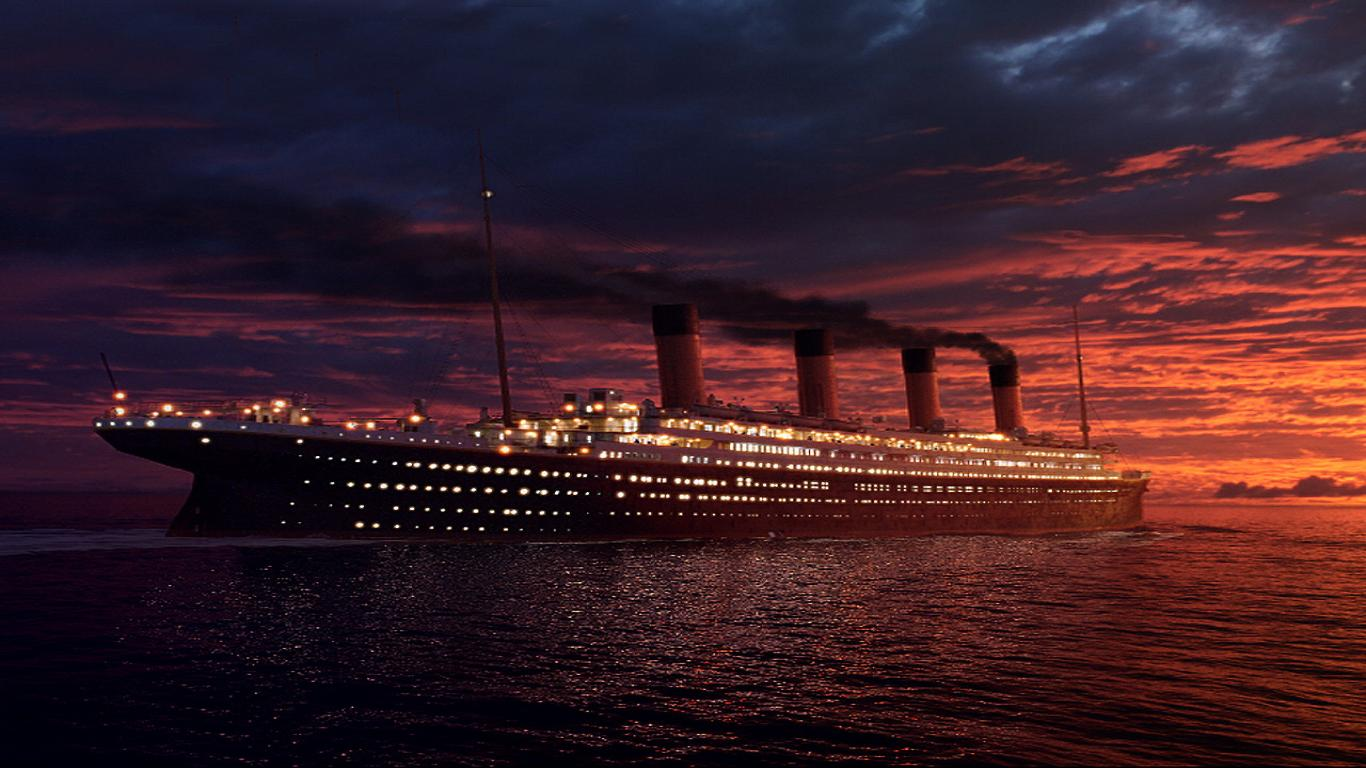

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

**IMPORT THE NEEDED FEATURES**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

READ THE DATA

In [68]:
train_data=pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [70]:
train_data.shape

(891, 12)

In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**NO.OF NULL VALUES**

In [72]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


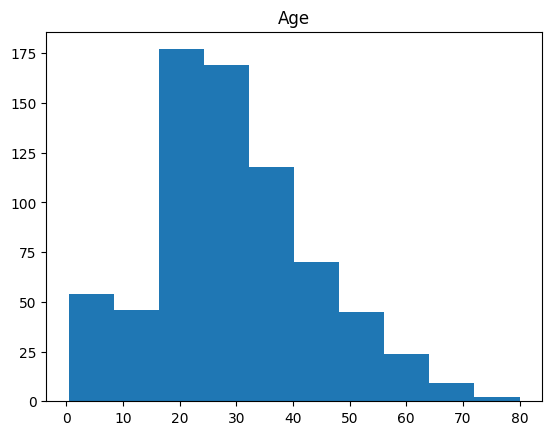

In [73]:
plt.hist(train_data["Age"])
plt.title("Age")
plt.show()


<Axes: xlabel='Pclass', ylabel='Fare'>

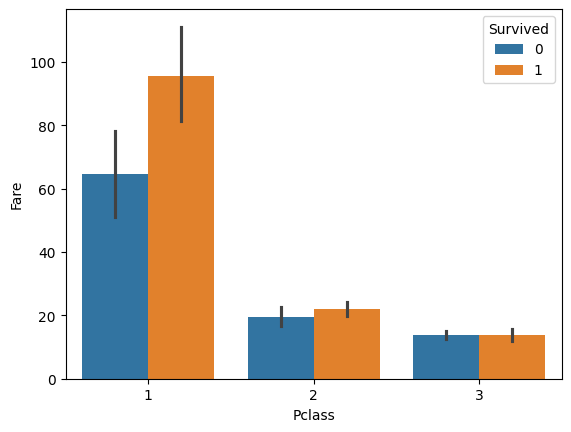

In [74]:
sns.barplot(data=train_data, x="Pclass", y="Fare", hue="Survived")

In [75]:
pd.pivot_table(train_data,index="Survived",values=["Age", "SibSp", "Parch", "Fare"])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


**PEOPLE SURVIVED WRT THE CLASSES**

In [76]:
pd.pivot_table(train_data, index="Survived", columns="Pclass", values="Ticket", aggfunc="count")

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


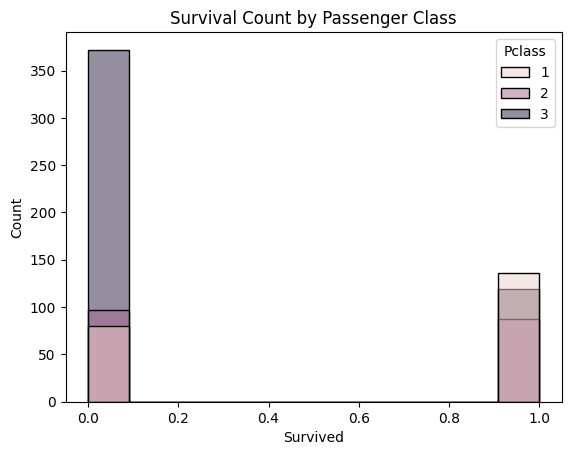

In [77]:
sns.histplot(data=train_data, x="Survived", hue="Pclass")
plt.title("Survival Count by Passenger Class")
plt.show()

**PEOPLE SURVIVED WRT EMBARKED**

In [78]:
pd.pivot_table(train_data,index="Embarked",columns="Pclass",values="Ticket",aggfunc="count")

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


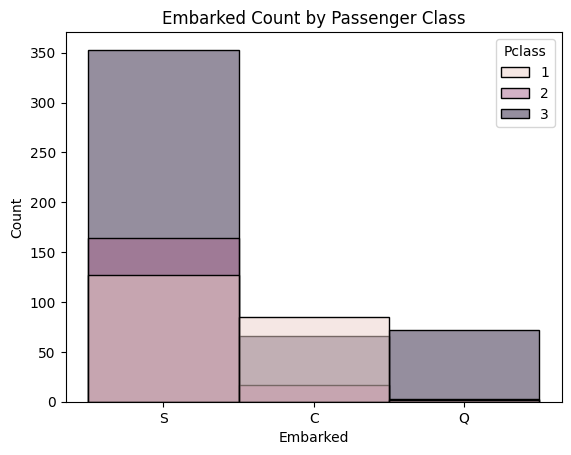

In [79]:
sns.histplot(train_data,x="Embarked",hue="Pclass")
plt.title("Embarked Count by Passenger Class")
plt.show()

In [80]:
pd.pivot_table(train_data, index="Sex", columns="Survived", values="Age", aggfunc="count")


Survived,0,1
Sex,,
female,64,197
male,360,93


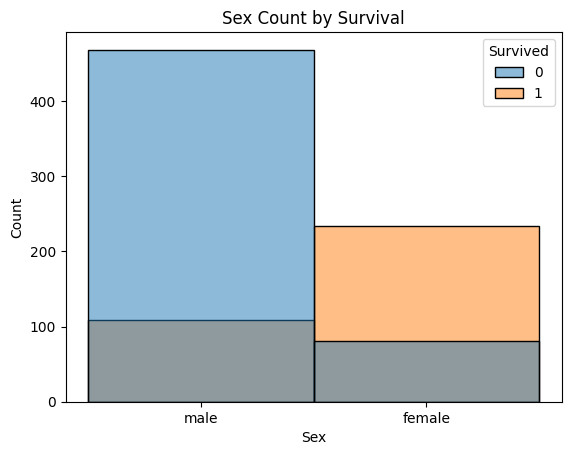

In [81]:
sns.histplot(train_data,x="Sex",hue="Survived")
plt.title("Sex Count by Survival")
plt.show()

**NULL DATA REMOVAL**

In [82]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [83]:
train_data = train_data.drop(columns=["PassengerId", "Cabin", "Name", "Ticket"])


In [84]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [85]:
train_data['Age']=train_data['Age'].fillna(train_data['Age'].mean())


In [86]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

**NULL DATA IS COMPLETELY REMOVED**

In [87]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


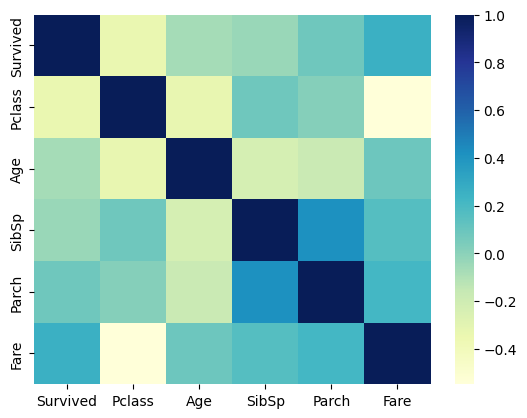

In [88]:
numeric_data = train_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), cmap="YlGnBu")
plt.show()

In [89]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**PREPROCESSING**

All the non-numeric columns are changing into numeric columns

In [90]:
from sklearn.preprocessing import LabelEncoder
column=['Sex','Embarked']
l=LabelEncoder()
for i in column:
  train_data[i]=l.fit_transform(train_data[i])
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [91]:
X=train_data.drop(columns=["Survived"],axis=1)
Y=train_data['Survived']

**MODEL TRAINING**

In [92]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)
model=LogisticRegression()
model.fit(X_train,Y_train)
print("Accuracy", model.score(X_test, Y_test))
score = cross_val_score(model, X, Y, cv=5)
print("CV SCORE :", np.mean(score))





/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy 0.8324022346368715
CV SCORE : 0.786761659657272


In [93]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [94]:
X_train_prediction=model.predict(X_train)
print(X_train_prediction)

[0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0
 0 1 0 1 0 1 1 0 1 1 1 1 

In [95]:
training_with_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of training data: " ,training_with_accuracy)

Accuracy score of training data:  0.7935393258426966


TEST DATA FROM THE TRAINING DATA

In [96]:
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0]


In [97]:
test_with_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of testing data: ",test_with_accuracy)

Accuracy score of testing data:  0.8324022346368715
